In [2]:
import pandas as pd
df = pd.read_csv(r'C:\Users\BEHARA AMULYA\Downloads\stutter-classification-main\SEP-28k_labels.csv')
df.head()

,Show,EpId,ClipId,Start,Stop,Unsure,PoorAudioQuality,Prolongation,Block,SoundRep,WordRep,DifficultToUnderstand,Interjection,NoStutteredWords,NaturalPause,Music,NoSpeech
0,HeStutters,0,0,31900320,31948320,0,0,0,0,0,0,0,0,3,1,0,0
1,HeStutters,0,1,31977120,32025120,0,0,0,0,0,0,0,0,3,1,0,0
2,HeStutters,0,2,34809760,34857760,0,0,0,0,0,0,0,0,3,0,0,0
3,HeStutters,0,3,35200640,35248640,0,0,1,0,0,0,0,0,2,0,0,0
4,HeStutters,0,4,35721920,35769920,0,0,0,0,0,0,0,0,3,0,0,0


In [3]:
df.shape

(28177, 17)

In [4]:
df.columns

Index(['Show', 'EpId', 'ClipId', 'Start', 'Stop', 'Unsure', 'PoorAudioQuality',
       'Prolongation', 'Block', 'SoundRep', 'WordRep', 'DifficultToUnderstand',
       'Interjection', 'NoStutteredWords', 'NaturalPause', 'Music',
       'NoSpeech'],
      dtype='object')

## Adding Name Column

In [5]:
df['Name'] = df[df.columns[0:3]].apply(
    lambda x: '_'.join(x.dropna().astype(str)),
    axis=1
)
df.head()

,Show,EpId,ClipId,Start,Stop,Unsure,PoorAudioQuality,Prolongation,Block,SoundRep,WordRep,DifficultToUnderstand,Interjection,NoStutteredWords,NaturalPause,Music,NoSpeech,Name
0,HeStutters,0,0,31900320,31948320,0,0,0,0,0,0,0,0,3,1,0,0,HeStutters_0_0
1,HeStutters,0,1,31977120,32025120,0,0,0,0,0,0,0,0,3,1,0,0,HeStutters_0_1
2,HeStutters,0,2,34809760,34857760,0,0,0,0,0,0,0,0,3,0,0,0,HeStutters_0_2
3,HeStutters,0,3,35200640,35248640,0,0,1,0,0,0,0,0,2,0,0,0,HeStutters_0_3
4,HeStutters,0,4,35721920,35769920,0,0,0,0,0,0,0,0,3,0,0,0,HeStutters_0_4


In [6]:
df['Name']

0                HeStutters_0_0
1                HeStutters_0_1
2                HeStutters_0_2
3                HeStutters_0_3
4                HeStutters_0_4
                  ...          
28172    WomenWhoStutter_109_35
28173    WomenWhoStutter_109_36
28174    WomenWhoStutter_109_37
28175    WomenWhoStutter_109_38
28176    WomenWhoStutter_109_39
Name: Name, Length: 28177, dtype: object

## Removing Empty Audios and there Dataset Entries

In [7]:
import os
os.stat(r'C:\Users\BEHARA AMULYA\Downloads\stutter-classification-main\clips\stuttering-clips\clips/HeStutters_0_9.wav').st_size

# empty files have st_size of 44

44

In [8]:
os.stat(r'C:\Users\BEHARA AMULYA\Downloads\stutter-classification-main\clips\stuttering-clips\clips\HeStutters_1_1.wav').st_size

# non empty file

96044

## Put empty filenames in a list and ignore them while feature extraction and training

In [9]:
CLIPS_DIR = "C:/Users/BEHARA AMULYA/Downloads/stutter-classification-main/clips/stuttering-clips/clips/"
ignore_list = []
for filename in os.listdir(CLIPS_DIR):
    file_path = CLIPS_DIR + filename
    if 'FluencyBank' not in filename:
        if os.stat(file_path).st_size == 44:
            ignore_list.append(filename)
            filename = filename[:-4]
            df = df[df.Name != filename]

print(len(ignore_list))

255


In [10]:
df.shape

# 255 rows removed from df as well

(27922, 18)

## MFCC Feature Extraction

In [11]:
import librosa
import numpy as np
from tqdm.notebook import tqdm

features = {}
directory = CLIPS_DIR

for filename in tqdm(os.listdir(CLIPS_DIR)):
    filename = filename[:-4]
    if 'FluencyBank' not in filename and ignore_list.count(filename + '.wav') == 0:
        audio, sample_rate = librosa.load(CLIPS_DIR + filename + '.wav', res_type='kaiser_fast', sr=None)
        mfccs = np.mean(librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13).T,axis=0)
        features[filename] = mfccs

  0%|          | 0/32321 [00:00<?, ?it/s]

In [12]:
print(len(features))

27922


In [13]:
len(features['HeStutters_1_1'])

13

## Making Dataset from Features

In [14]:
df_features = pd.DataFrame.from_dict(features)
df_features = df_features.transpose()
df_features

,0,1,2,3,4,5,6,7,8,9,10,11,12
HeStutters_0_17,-383.235901,49.986275,2.692034,14.354122,1.777423,-2.420321,-12.342792,1.071969,-9.256073,-6.607179,-0.808944,-9.527816,-5.364853
HeStutters_0_18,-360.241272,66.061165,-1.453862,11.259468,-4.462043,-0.253932,-5.415998,-6.300482,-7.769227,-6.499992,-2.834178,-6.035948,-7.483030
HeStutters_0_19,-293.655060,73.833069,1.900996,-2.408337,-4.000989,1.076604,-3.904765,-3.917793,-7.314900,-5.230086,1.173894,-10.094393,-5.409697
HeStutters_0_20,-300.604645,52.587803,-1.105800,22.788185,-2.626716,-5.491357,-18.113766,0.016458,-17.751234,-10.870637,-3.549484,-9.037821,-6.599054
HeStutters_0_26,-322.675629,39.411560,-26.036314,31.284819,-20.774286,-5.054771,-8.849819,-4.670223,-6.783212,-8.442830,-9.905902,-7.322883,-6.587360
...,...,...,...,...,...,...,...,...,...,...,...,...,...
WomenWhoStutter_9_5,-331.060883,8.423903,-32.912949,25.618410,-23.380974,2.367110,-14.927206,-5.307972,0.028713,-7.770761,-5.659303,-3.837937,-1.988657
WomenWhoStutter_9_6,-287.171539,24.612038,11.593972,-2.373056,-19.041912,1.381283,-8.410913,-6.094383,-21.232750,1.682820,-18.440485,5.257690,-14.749623
WomenWhoStutter_9_7,-284.419800,69.935951,4.447363,25.512445,-23.518826,-3.872554,2.403314,-14.279770,-22.613018,5.954080,-23.500149,-1.513232,-22.199068
WomenWhoStutter_9_8,-359.677979,48.367874,14.129636,3.370608,-19.779860,1.081613,-1.617015,-4.654689,-21.594164,-1.051908,-16.132730,8.522468,-16.694765


In [15]:
df_features = df_features.reset_index()

In [16]:
df_features

,index,0,1,2,3,4,5,6,7,8,9,10,11,12
0,HeStutters_0_17,-383.235901,49.986275,2.692034,14.354122,1.777423,-2.420321,-12.342792,1.071969,-9.256073,-6.607179,-0.808944,-9.527816,-5.364853
1,HeStutters_0_18,-360.241272,66.061165,-1.453862,11.259468,-4.462043,-0.253932,-5.415998,-6.300482,-7.769227,-6.499992,-2.834178,-6.035948,-7.483030
2,HeStutters_0_19,-293.655060,73.833069,1.900996,-2.408337,-4.000989,1.076604,-3.904765,-3.917793,-7.314900,-5.230086,1.173894,-10.094393,-5.409697
3,HeStutters_0_20,-300.604645,52.587803,-1.105800,22.788185,-2.626716,-5.491357,-18.113766,0.016458,-17.751234,-10.870637,-3.549484,-9.037821,-6.599054
4,HeStutters_0_26,-322.675629,39.411560,-26.036314,31.284819,-20.774286,-5.054771,-8.849819,-4.670223,-6.783212,-8.442830,-9.905902,-7.322883,-6.587360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27917,WomenWhoStutter_9_5,-331.060883,8.423903,-32.912949,25.618410,-23.380974,2.367110,-14.927206,-5.307972,0.028713,-7.770761,-5.659303,-3.837937,-1.988657
27918,WomenWhoStutter_9_6,-287.171539,24.612038,11.593972,-2.373056,-19.041912,1.381283,-8.410913,-6.094383,-21.232750,1.682820,-18.440485,5.257690,-14.749623
27919,WomenWhoStutter_9_7,-284.419800,69.935951,4.447363,25.512445,-23.518826,-3.872554,2.403314,-14.279770,-22.613018,5.954080,-23.500149,-1.513232,-22.199068
27920,WomenWhoStutter_9_8,-359.677979,48.367874,14.129636,3.370608,-19.779860,1.081613,-1.617015,-4.654689,-21.594164,-1.051908,-16.132730,8.522468,-16.694765


In [17]:
df_features = df_features.sort_values(by='index')
df_features

,index,0,1,2,3,4,5,6,7,8,9,10,11,12
3568,HVSA_0_0,-672.897095,42.572784,-9.060439,17.092854,5.601505,11.969573,5.087627,1.287422,-1.221630,5.906602,0.396098,2.618646,2.006739
3569,HVSA_0_1,-463.573730,69.182426,-18.914116,22.859167,0.735867,-7.253484,-7.202471,-5.319007,-5.854908,4.434800,-2.941299,0.067582,-10.047692
3570,HVSA_0_10,-452.379944,58.461529,-26.529568,10.806605,1.040503,-11.684420,-15.975951,-17.110935,-8.533495,3.804466,-0.904714,1.546399,-5.672768
3571,HVSA_0_100,-454.134888,85.565834,-16.623932,23.212677,-7.808691,-7.204673,-8.445450,-17.406025,-16.752821,-5.885375,0.342238,1.163814,-5.125269
3572,HVSA_0_101,-419.757965,73.650093,-20.263416,30.691795,-5.919299,-15.747583,-17.799961,-13.380461,-10.132166,-2.647573,1.943859,-0.861620,-5.781014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27917,WomenWhoStutter_9_5,-331.060883,8.423903,-32.912949,25.618410,-23.380974,2.367110,-14.927206,-5.307972,0.028713,-7.770761,-5.659303,-3.837937,-1.988657
27918,WomenWhoStutter_9_6,-287.171539,24.612038,11.593972,-2.373056,-19.041912,1.381283,-8.410913,-6.094383,-21.232750,1.682820,-18.440485,5.257690,-14.749623
27919,WomenWhoStutter_9_7,-284.419800,69.935951,4.447363,25.512445,-23.518826,-3.872554,2.403314,-14.279770,-22.613018,5.954080,-23.500149,-1.513232,-22.199068
27920,WomenWhoStutter_9_8,-359.677979,48.367874,14.129636,3.370608,-19.779860,1.081613,-1.617015,-4.654689,-21.594164,-1.051908,-16.132730,8.522468,-16.694765


In [18]:
df_features['index']

3568                HVSA_0_0
3569                HVSA_0_1
3570               HVSA_0_10
3571              HVSA_0_100
3572              HVSA_0_101
                ...         
27917    WomenWhoStutter_9_5
27918    WomenWhoStutter_9_6
27919    WomenWhoStutter_9_7
27920    WomenWhoStutter_9_8
27921    WomenWhoStutter_9_9
Name: index, Length: 27922, dtype: object

In [19]:
df['Name']

17              HeStutters_0_17
18              HeStutters_0_18
19              HeStutters_0_19
20              HeStutters_0_20
26              HeStutters_0_26
                  ...          
28172    WomenWhoStutter_109_35
28173    WomenWhoStutter_109_36
28174    WomenWhoStutter_109_37
28175    WomenWhoStutter_109_38
28176    WomenWhoStutter_109_39
Name: Name, Length: 27922, dtype: object

## Applying Inner Join on the dataframes

In [20]:
df_features.rename(columns = {'index':'Name'}, inplace = True)
df_features

,Name,0,1,2,3,4,5,6,7,8,9,10,11,12
3568,HVSA_0_0,-672.897095,42.572784,-9.060439,17.092854,5.601505,11.969573,5.087627,1.287422,-1.221630,5.906602,0.396098,2.618646,2.006739
3569,HVSA_0_1,-463.573730,69.182426,-18.914116,22.859167,0.735867,-7.253484,-7.202471,-5.319007,-5.854908,4.434800,-2.941299,0.067582,-10.047692
3570,HVSA_0_10,-452.379944,58.461529,-26.529568,10.806605,1.040503,-11.684420,-15.975951,-17.110935,-8.533495,3.804466,-0.904714,1.546399,-5.672768
3571,HVSA_0_100,-454.134888,85.565834,-16.623932,23.212677,-7.808691,-7.204673,-8.445450,-17.406025,-16.752821,-5.885375,0.342238,1.163814,-5.125269
3572,HVSA_0_101,-419.757965,73.650093,-20.263416,30.691795,-5.919299,-15.747583,-17.799961,-13.380461,-10.132166,-2.647573,1.943859,-0.861620,-5.781014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27917,WomenWhoStutter_9_5,-331.060883,8.423903,-32.912949,25.618410,-23.380974,2.367110,-14.927206,-5.307972,0.028713,-7.770761,-5.659303,-3.837937,-1.988657
27918,WomenWhoStutter_9_6,-287.171539,24.612038,11.593972,-2.373056,-19.041912,1.381283,-8.410913,-6.094383,-21.232750,1.682820,-18.440485,5.257690,-14.749623
27919,WomenWhoStutter_9_7,-284.419800,69.935951,4.447363,25.512445,-23.518826,-3.872554,2.403314,-14.279770,-22.613018,5.954080,-23.500149,-1.513232,-22.199068
27920,WomenWhoStutter_9_8,-359.677979,48.367874,14.129636,3.370608,-19.779860,1.081613,-1.617015,-4.654689,-21.594164,-1.051908,-16.132730,8.522468,-16.694765


In [21]:
df_final = pd.merge(df, df_features, how='inner', on='Name')
df_final

,Show,EpId,ClipId,Start,Stop,Unsure,PoorAudioQuality,Prolongation,Block,SoundRep,...,3,4,5,6,7,8,9,10,11,12
0,HeStutters,0,17,6970880,7018880,0,0,0,0,0,...,14.354122,1.777423,-2.420321,-12.342792,1.071969,-9.256073,-6.607179,-0.808944,-9.527816,-5.364853
1,HeStutters,0,18,8215200,8263200,0,0,0,1,0,...,11.259468,-4.462043,-0.253932,-5.415998,-6.300482,-7.769227,-6.499992,-2.834178,-6.035948,-7.483030
2,HeStutters,0,19,9985280,10033280,0,0,1,0,0,...,-2.408337,-4.000989,1.076604,-3.904765,-3.917793,-7.314900,-5.230086,1.173894,-10.094393,-5.409697
3,HeStutters,0,20,11197600,11245600,0,0,0,0,0,...,22.788185,-2.626716,-5.491357,-18.113766,0.016458,-17.751234,-10.870637,-3.549484,-9.037821,-6.599054
4,HeStutters,0,26,3562240,3610240,0,0,0,0,0,...,31.284819,-20.774286,-5.054771,-8.849819,-4.670223,-6.783212,-8.442830,-9.905902,-7.322883,-6.587360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27917,WomenWhoStutter,109,35,25793600,25841600,0,0,0,0,0,...,20.143105,-26.160034,3.709442,-15.719242,2.436149,-1.615796,-5.105469,-10.272826,-3.074089,-6.375842
27918,WomenWhoStutter,109,36,26168480,26216480,0,0,1,1,3,...,29.588446,-10.896355,-14.222120,-9.167952,-1.676773,-8.374956,-6.297094,1.265485,-4.014944,-0.196149
27919,WomenWhoStutter,109,37,3569440,3617440,0,0,0,0,0,...,9.234312,-27.815414,-5.439771,-17.093634,-8.942756,-1.638182,-3.736795,-0.968334,-7.699897,0.135829
27920,WomenWhoStutter,109,38,28479840,28527840,0,0,1,0,0,...,26.443159,-24.452450,-10.057508,-10.132120,-4.451963,-1.437817,-11.729813,-6.692399,0.137548,-3.664661


In [22]:
df_final.head()

,Show,EpId,ClipId,Start,Stop,Unsure,PoorAudioQuality,Prolongation,Block,SoundRep,...,3,4,5,6,7,8,9,10,11,12
0,HeStutters,0,17,6970880,7018880,0,0,0,0,0,...,14.354122,1.777423,-2.420321,-12.342792,1.071969,-9.256073,-6.607179,-0.808944,-9.527816,-5.364853
1,HeStutters,0,18,8215200,8263200,0,0,0,1,0,...,11.259468,-4.462043,-0.253932,-5.415998,-6.300482,-7.769227,-6.499992,-2.834178,-6.035948,-7.483030
2,HeStutters,0,19,9985280,10033280,0,0,1,0,0,...,-2.408337,-4.000989,1.076604,-3.904765,-3.917793,-7.314900,-5.230086,1.173894,-10.094393,-5.409697
3,HeStutters,0,20,11197600,11245600,0,0,0,0,0,...,22.788185,-2.626716,-5.491357,-18.113766,0.016458,-17.751234,-10.870637,-3.549484,-9.037821,-6.599054
4,HeStutters,0,26,3562240,3610240,0,0,0,0,0,...,31.284819,-20.774286,-5.054771,-8.849819,-4.670223,-6.783212,-8.442830,-9.905902,-7.322883,-6.587360


In [23]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27922 entries, 0 to 27921
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Show                   27922 non-null  object 
 1   EpId                   27922 non-null  int64  
 2   ClipId                 27922 non-null  int64  
 3   Start                  27922 non-null  int64  
 4   Stop                   27922 non-null  int64  
 5   Unsure                 27922 non-null  int64  
 6   PoorAudioQuality       27922 non-null  int64  
 7   Prolongation           27922 non-null  int64  
 8   Block                  27922 non-null  int64  
 9   SoundRep               27922 non-null  int64  
 10  WordRep                27922 non-null  int64  
 11  DifficultToUnderstand  27922 non-null  int64  
 12  Interjection           27922 non-null  int64  
 13  NoStutteredWords       27922 non-null  int64  
 14  NaturalPause           27922 non-null  int64  
 15  Mu

In [24]:
# df_final['Stutter'] = df['WordRep'] + df['SoundRep'] + df['Prolongation'] + df['Interjection']
# df_final

In [25]:
# df_final['Stutter'].value_counts()

In [26]:
# df_final = df_final[df_final.Stutter != 0]
# Remove Non-Stuttered Clips

# df_final.loc[df_final['Stutter'] >= 1.0, 'Stutter'] = 1.0
# df_final['Stutter'].value_counts()

In [27]:
df_final = df_final[df_final.PoorAudioQuality == 0]
df_final

,Show,EpId,ClipId,Start,Stop,Unsure,PoorAudioQuality,Prolongation,Block,SoundRep,...,3,4,5,6,7,8,9,10,11,12
0,HeStutters,0,17,6970880,7018880,0,0,0,0,0,...,14.354122,1.777423,-2.420321,-12.342792,1.071969,-9.256073,-6.607179,-0.808944,-9.527816,-5.364853
1,HeStutters,0,18,8215200,8263200,0,0,0,1,0,...,11.259468,-4.462043,-0.253932,-5.415998,-6.300482,-7.769227,-6.499992,-2.834178,-6.035948,-7.483030
2,HeStutters,0,19,9985280,10033280,0,0,1,0,0,...,-2.408337,-4.000989,1.076604,-3.904765,-3.917793,-7.314900,-5.230086,1.173894,-10.094393,-5.409697
3,HeStutters,0,20,11197600,11245600,0,0,0,0,0,...,22.788185,-2.626716,-5.491357,-18.113766,0.016458,-17.751234,-10.870637,-3.549484,-9.037821,-6.599054
4,HeStutters,0,26,3562240,3610240,0,0,0,0,0,...,31.284819,-20.774286,-5.054771,-8.849819,-4.670223,-6.783212,-8.442830,-9.905902,-7.322883,-6.587360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27917,WomenWhoStutter,109,35,25793600,25841600,0,0,0,0,0,...,20.143105,-26.160034,3.709442,-15.719242,2.436149,-1.615796,-5.105469,-10.272826,-3.074089,-6.375842
27918,WomenWhoStutter,109,36,26168480,26216480,0,0,1,1,3,...,29.588446,-10.896355,-14.222120,-9.167952,-1.676773,-8.374956,-6.297094,1.265485,-4.014944,-0.196149
27919,WomenWhoStutter,109,37,3569440,3617440,0,0,0,0,0,...,9.234312,-27.815414,-5.439771,-17.093634,-8.942756,-1.638182,-3.736795,-0.968334,-7.699897,0.135829
27920,WomenWhoStutter,109,38,28479840,28527840,0,0,1,0,0,...,26.443159,-24.452450,-10.057508,-10.132120,-4.451963,-1.437817,-11.729813,-6.692399,0.137548,-3.664661


In [28]:
df_final = df_final[df_final.DifficultToUnderstand == 0]
df_final

,Show,EpId,ClipId,Start,Stop,Unsure,PoorAudioQuality,Prolongation,Block,SoundRep,...,3,4,5,6,7,8,9,10,11,12
0,HeStutters,0,17,6970880,7018880,0,0,0,0,0,...,14.354122,1.777423,-2.420321,-12.342792,1.071969,-9.256073,-6.607179,-0.808944,-9.527816,-5.364853
1,HeStutters,0,18,8215200,8263200,0,0,0,1,0,...,11.259468,-4.462043,-0.253932,-5.415998,-6.300482,-7.769227,-6.499992,-2.834178,-6.035948,-7.483030
2,HeStutters,0,19,9985280,10033280,0,0,1,0,0,...,-2.408337,-4.000989,1.076604,-3.904765,-3.917793,-7.314900,-5.230086,1.173894,-10.094393,-5.409697
3,HeStutters,0,20,11197600,11245600,0,0,0,0,0,...,22.788185,-2.626716,-5.491357,-18.113766,0.016458,-17.751234,-10.870637,-3.549484,-9.037821,-6.599054
4,HeStutters,0,26,3562240,3610240,0,0,0,0,0,...,31.284819,-20.774286,-5.054771,-8.849819,-4.670223,-6.783212,-8.442830,-9.905902,-7.322883,-6.587360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27916,WomenWhoStutter,109,34,24781440,24829440,0,0,0,0,0,...,5.831603,-24.096714,-9.137780,-8.294982,-17.235237,-3.540516,-5.074908,-3.828186,-5.524163,-5.444092
27917,WomenWhoStutter,109,35,25793600,25841600,0,0,0,0,0,...,20.143105,-26.160034,3.709442,-15.719242,2.436149,-1.615796,-5.105469,-10.272826,-3.074089,-6.375842
27919,WomenWhoStutter,109,37,3569440,3617440,0,0,0,0,0,...,9.234312,-27.815414,-5.439771,-17.093634,-8.942756,-1.638182,-3.736795,-0.968334,-7.699897,0.135829
27920,WomenWhoStutter,109,38,28479840,28527840,0,0,1,0,0,...,26.443159,-24.452450,-10.057508,-10.132120,-4.451963,-1.437817,-11.729813,-6.692399,0.137548,-3.664661


In [29]:
df_final = df_final[df_final.Music == 0]
df_final

,Show,EpId,ClipId,Start,Stop,Unsure,PoorAudioQuality,Prolongation,Block,SoundRep,...,3,4,5,6,7,8,9,10,11,12
0,HeStutters,0,17,6970880,7018880,0,0,0,0,0,...,14.354122,1.777423,-2.420321,-12.342792,1.071969,-9.256073,-6.607179,-0.808944,-9.527816,-5.364853
1,HeStutters,0,18,8215200,8263200,0,0,0,1,0,...,11.259468,-4.462043,-0.253932,-5.415998,-6.300482,-7.769227,-6.499992,-2.834178,-6.035948,-7.483030
2,HeStutters,0,19,9985280,10033280,0,0,1,0,0,...,-2.408337,-4.000989,1.076604,-3.904765,-3.917793,-7.314900,-5.230086,1.173894,-10.094393,-5.409697
3,HeStutters,0,20,11197600,11245600,0,0,0,0,0,...,22.788185,-2.626716,-5.491357,-18.113766,0.016458,-17.751234,-10.870637,-3.549484,-9.037821,-6.599054
4,HeStutters,0,26,3562240,3610240,0,0,0,0,0,...,31.284819,-20.774286,-5.054771,-8.849819,-4.670223,-6.783212,-8.442830,-9.905902,-7.322883,-6.587360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27916,WomenWhoStutter,109,34,24781440,24829440,0,0,0,0,0,...,5.831603,-24.096714,-9.137780,-8.294982,-17.235237,-3.540516,-5.074908,-3.828186,-5.524163,-5.444092
27917,WomenWhoStutter,109,35,25793600,25841600,0,0,0,0,0,...,20.143105,-26.160034,3.709442,-15.719242,2.436149,-1.615796,-5.105469,-10.272826,-3.074089,-6.375842
27919,WomenWhoStutter,109,37,3569440,3617440,0,0,0,0,0,...,9.234312,-27.815414,-5.439771,-17.093634,-8.942756,-1.638182,-3.736795,-0.968334,-7.699897,0.135829
27920,WomenWhoStutter,109,38,28479840,28527840,0,0,1,0,0,...,26.443159,-24.452450,-10.057508,-10.132120,-4.451963,-1.437817,-11.729813,-6.692399,0.137548,-3.664661


In [30]:
df_final = df_final[df_final.NoSpeech == 0]
df_final

,Show,EpId,ClipId,Start,Stop,Unsure,PoorAudioQuality,Prolongation,Block,SoundRep,...,3,4,5,6,7,8,9,10,11,12
0,HeStutters,0,17,6970880,7018880,0,0,0,0,0,...,14.354122,1.777423,-2.420321,-12.342792,1.071969,-9.256073,-6.607179,-0.808944,-9.527816,-5.364853
1,HeStutters,0,18,8215200,8263200,0,0,0,1,0,...,11.259468,-4.462043,-0.253932,-5.415998,-6.300482,-7.769227,-6.499992,-2.834178,-6.035948,-7.483030
2,HeStutters,0,19,9985280,10033280,0,0,1,0,0,...,-2.408337,-4.000989,1.076604,-3.904765,-3.917793,-7.314900,-5.230086,1.173894,-10.094393,-5.409697
3,HeStutters,0,20,11197600,11245600,0,0,0,0,0,...,22.788185,-2.626716,-5.491357,-18.113766,0.016458,-17.751234,-10.870637,-3.549484,-9.037821,-6.599054
4,HeStutters,0,26,3562240,3610240,0,0,0,0,0,...,31.284819,-20.774286,-5.054771,-8.849819,-4.670223,-6.783212,-8.442830,-9.905902,-7.322883,-6.587360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27916,WomenWhoStutter,109,34,24781440,24829440,0,0,0,0,0,...,5.831603,-24.096714,-9.137780,-8.294982,-17.235237,-3.540516,-5.074908,-3.828186,-5.524163,-5.444092
27917,WomenWhoStutter,109,35,25793600,25841600,0,0,0,0,0,...,20.143105,-26.160034,3.709442,-15.719242,2.436149,-1.615796,-5.105469,-10.272826,-3.074089,-6.375842
27919,WomenWhoStutter,109,37,3569440,3617440,0,0,0,0,0,...,9.234312,-27.815414,-5.439771,-17.093634,-8.942756,-1.638182,-3.736795,-0.968334,-7.699897,0.135829
27920,WomenWhoStutter,109,38,28479840,28527840,0,0,1,0,0,...,26.443159,-24.452450,-10.057508,-10.132120,-4.451963,-1.437817,-11.729813,-6.692399,0.137548,-3.664661


In [31]:
df_final.to_csv("sep28k-mfcc.csv",index=False)

## Model Creation & Training for SoundRep Classification

In [32]:
import pandas as pd
df = pd.read_csv("C:/Users/BEHARA AMULYA/Downloads/stutter-classification-main/sep28k-mfcc.csv")

In [33]:
df = df[df['NoStutteredWords'] != 0]
df = df[df['NaturalPause'] == 0]
df = df[df['Interjection'] == 0]
df = df[df['Prolongation'] == 0]
df = df[df['WordRep'] == 0]
df = df[df['Block'] == 0]
df

,Show,EpId,ClipId,Start,Stop,Unsure,PoorAudioQuality,Prolongation,Block,SoundRep,...,3,4,5,6,7,8,9,10,11,12
3,HeStutters,0,20,11197600,11245600,0,0,0,0,0,...,22.788187,-2.626716,-5.491358,-18.113768,0.016458,-17.751234,-10.870638,-3.549485,-9.037821,-6.599053
4,HeStutters,0,26,3562240,3610240,0,0,0,0,0,...,31.284819,-20.774286,-5.054771,-8.849820,-4.670221,-6.783212,-8.442829,-9.905901,-7.322884,-6.587358
8,HeStutters,1,4,28351360,28399360,0,0,0,0,0,...,26.878878,-11.660660,3.515312,-27.021893,-11.834179,-7.582844,-7.805755,-12.518568,-1.051659,-7.828530
18,HeStutters,1,105,6492320,6540320,0,0,0,0,2,...,9.991777,6.028349,-7.291534,-25.489399,-14.340752,-14.337445,1.463035,-16.014809,-0.031667,0.534200
19,HeStutters,1,107,6638560,6686560,0,0,0,0,0,...,29.173650,7.216802,5.993933,-13.808914,-6.984492,-11.859511,-2.531782,-16.870178,-5.008951,-4.917668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20853,WomenWhoStutter,109,24,16179040,16227040,0,0,0,0,0,...,26.002850,-16.124638,-14.775825,-19.643902,-7.232812,-7.771849,-8.517389,1.568446,-6.449149,1.097682
20854,WomenWhoStutter,109,25,16224160,16272160,0,0,0,0,0,...,8.484955,-29.523212,-2.754525,-15.226071,-7.238213,1.549138,-8.778445,-10.499597,-2.756171,-6.887869
20860,WomenWhoStutter,109,31,20476320,20524320,0,0,0,0,0,...,16.823689,-23.059584,-6.954723,-10.113501,-13.114474,0.588608,-15.267632,-10.101980,-0.440983,0.197351
20862,WomenWhoStutter,109,33,24747360,24795360,0,0,0,0,0,...,18.849451,-23.086061,2.158868,-8.471071,1.332367,2.440633,-1.968005,-7.462198,0.142006,-4.275125


In [34]:
df.loc[df['SoundRep'] >= 1.0, 'SoundRep'] = 1.0
df['SoundRep'].value_counts()

0    2471
1     156
Name: SoundRep, dtype: int64

In [35]:
X = df.iloc[: , -13:]
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
3,-300.60464,52.587803,-1.105800,22.788187,-2.626716,-5.491358,-18.113768,0.016458,-17.751234,-10.870638,-3.549485,-9.037821,-6.599053
4,-322.67563,39.411560,-26.036314,31.284819,-20.774286,-5.054771,-8.849820,-4.670221,-6.783212,-8.442829,-9.905901,-7.322884,-6.587358
8,-418.44520,103.886830,-30.266285,26.878878,-11.660660,3.515312,-27.021893,-11.834179,-7.582844,-7.805755,-12.518568,-1.051659,-7.828530
18,-399.46472,92.754060,-31.619010,9.991777,6.028349,-7.291534,-25.489399,-14.340752,-14.337445,1.463035,-16.014809,-0.031667,0.534200
19,-475.87134,93.217606,3.080705,29.173650,7.216802,5.993933,-13.808914,-6.984492,-11.859511,-2.531782,-16.870178,-5.008951,-4.917668
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20853,-396.81604,47.699257,-28.230510,26.002850,-16.124638,-14.775825,-19.643902,-7.232812,-7.771849,-8.517389,1.568446,-6.449149,1.097682
20854,-366.09630,59.089500,-23.645912,8.484955,-29.523212,-2.754525,-15.226071,-7.238213,1.549138,-8.778445,-10.499597,-2.756171,-6.887869
20860,-316.00027,42.245804,-40.056350,16.823689,-23.059584,-6.954723,-10.113501,-13.114474,0.588608,-15.267632,-10.101980,-0.440983,0.197351
20862,-350.42902,27.453857,-35.155910,18.849451,-23.086061,2.158868,-8.471071,1.332367,2.440633,-1.968005,-7.462198,0.142006,-4.275125


In [36]:
y = df['SoundRep']
y

3        0
4        0
8        0
18       1
19       0
        ..
20853    0
20854    0
20860    0
20862    0
20867    0
Name: SoundRep, Length: 2627, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.4, random_state=42)

In [38]:
from collections import Counter
Counter(y_train)

Counter({0: 1480, 1: 96})

In [39]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy',random_state=5)
clf.fit(X_train, y_train)
clf.score(X_test,y_test) * 100

89.5337773549001

In [40]:
y_pred = np.array(clf.predict(X_test))
y_actual = np.array(y_test)
print(Counter(y_pred))
print(Counter(y_actual))

Counter({0: 981, 1: 70})
Counter({0: 991, 1: 60})


## Model Creation & Training for WordRep Classification

In [41]:
import pandas as pd
df = pd.read_csv("C:/Users/BEHARA AMULYA/Downloads/stutter-classification-main/sep28k-mfcc.csv")

In [42]:
df.columns

Index(['Show', 'EpId', 'ClipId', 'Start', 'Stop', 'Unsure', 'PoorAudioQuality',
       'Prolongation', 'Block', 'SoundRep', 'WordRep', 'DifficultToUnderstand',
       'Interjection', 'NoStutteredWords', 'NaturalPause', 'Music', 'NoSpeech',
       'Name', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12'],
      dtype='object')

In [43]:
df.shape

(20868, 31)

In [44]:
df = df[df['NoStutteredWords'] != 0]
df = df[df['NaturalPause'] == 0]
df = df[df['Interjection'] == 0]
df = df[df['Prolongation'] == 0]
df = df[df['SoundRep'] == 0]
df = df[df['Block'] == 0]
df

,Show,EpId,ClipId,Start,Stop,Unsure,PoorAudioQuality,Prolongation,Block,SoundRep,...,3,4,5,6,7,8,9,10,11,12
3,HeStutters,0,20,11197600,11245600,0,0,0,0,0,...,22.788187,-2.626716,-5.491358,-18.113768,0.016458,-17.751234,-10.870638,-3.549485,-9.037821,-6.599053
4,HeStutters,0,26,3562240,3610240,0,0,0,0,0,...,31.284819,-20.774286,-5.054771,-8.849820,-4.670221,-6.783212,-8.442829,-9.905901,-7.322884,-6.587358
8,HeStutters,1,4,28351360,28399360,0,0,0,0,0,...,26.878878,-11.660660,3.515312,-27.021893,-11.834179,-7.582844,-7.805755,-12.518568,-1.051659,-7.828530
11,HeStutters,1,8,28539840,28587840,0,0,0,0,0,...,13.250941,4.572205,0.690116,-12.168562,-10.612210,-17.491869,-2.735057,-9.947231,-9.058744,-8.354892
19,HeStutters,1,107,6638560,6686560,0,0,0,0,0,...,29.173650,7.216802,5.993933,-13.808914,-6.984492,-11.859511,-2.531782,-16.870178,-5.008951,-4.917668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20853,WomenWhoStutter,109,24,16179040,16227040,0,0,0,0,0,...,26.002850,-16.124638,-14.775825,-19.643902,-7.232812,-7.771849,-8.517389,1.568446,-6.449149,1.097682
20854,WomenWhoStutter,109,25,16224160,16272160,0,0,0,0,0,...,8.484955,-29.523212,-2.754525,-15.226071,-7.238213,1.549138,-8.778445,-10.499597,-2.756171,-6.887869
20860,WomenWhoStutter,109,31,20476320,20524320,0,0,0,0,0,...,16.823689,-23.059584,-6.954723,-10.113501,-13.114474,0.588608,-15.267632,-10.101980,-0.440983,0.197351
20862,WomenWhoStutter,109,33,24747360,24795360,0,0,0,0,0,...,18.849451,-23.086061,2.158868,-8.471071,1.332367,2.440633,-1.968005,-7.462198,0.142006,-4.275125


In [45]:
df.loc[df['WordRep'] >= 1.0, 'WordRep'] = 1.0
df['WordRep'].value_counts()

0    2471
1     192
Name: WordRep, dtype: int64

In [46]:
X = df.iloc[: , -13:]
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
3,-300.60464,52.587803,-1.105800,22.788187,-2.626716,-5.491358,-18.113768,0.016458,-17.751234,-10.870638,-3.549485,-9.037821,-6.599053
4,-322.67563,39.411560,-26.036314,31.284819,-20.774286,-5.054771,-8.849820,-4.670221,-6.783212,-8.442829,-9.905901,-7.322884,-6.587358
8,-418.44520,103.886830,-30.266285,26.878878,-11.660660,3.515312,-27.021893,-11.834179,-7.582844,-7.805755,-12.518568,-1.051659,-7.828530
11,-494.81573,84.972070,1.017862,13.250941,4.572205,0.690116,-12.168562,-10.612210,-17.491869,-2.735057,-9.947231,-9.058744,-8.354892
19,-475.87134,93.217606,3.080705,29.173650,7.216802,5.993933,-13.808914,-6.984492,-11.859511,-2.531782,-16.870178,-5.008951,-4.917668
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20853,-396.81604,47.699257,-28.230510,26.002850,-16.124638,-14.775825,-19.643902,-7.232812,-7.771849,-8.517389,1.568446,-6.449149,1.097682
20854,-366.09630,59.089500,-23.645912,8.484955,-29.523212,-2.754525,-15.226071,-7.238213,1.549138,-8.778445,-10.499597,-2.756171,-6.887869
20860,-316.00027,42.245804,-40.056350,16.823689,-23.059584,-6.954723,-10.113501,-13.114474,0.588608,-15.267632,-10.101980,-0.440983,0.197351
20862,-350.42902,27.453857,-35.155910,18.849451,-23.086061,2.158868,-8.471071,1.332367,2.440633,-1.968005,-7.462198,0.142006,-4.275125


In [47]:
y = df['WordRep']
y

3        0
4        0
8        0
11       1
19       0
        ..
20853    0
20854    0
20860    0
20862    0
20867    0
Name: WordRep, Length: 2663, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.4, random_state=42)

from collections import Counter
Counter(y_train)

Counter({0: 1476, 1: 121})

In [49]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini',random_state=5)
# clf.fit(X_over, y_over)
# clf.fit(X_smote, y_smote)
# clf.fit(X_pipe, y_pipe)
clf.fit(X_train, y_train)
clf.score(X_test,y_test) * 100

86.11632270168855

In [50]:
y_pred = np.array(clf.predict(X_test))
y_actual = np.array(y_test)
print(Counter(y_pred))
print(Counter(y_actual))

Counter({0: 977, 1: 89})
Counter({0: 995, 1: 71})


## Model Creation & Training for Prolongation Classification

In [51]:
import pandas as pd
df = pd.read_csv("C:/Users/BEHARA AMULYA/Downloads/stutter-classification-main/sep28k-mfcc.csv")

In [52]:
df.columns

Index(['Show', 'EpId', 'ClipId', 'Start', 'Stop', 'Unsure', 'PoorAudioQuality',
       'Prolongation', 'Block', 'SoundRep', 'WordRep', 'DifficultToUnderstand',
       'Interjection', 'NoStutteredWords', 'NaturalPause', 'Music', 'NoSpeech',
       'Name', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12'],
      dtype='object')

In [53]:
df.shape

(20868, 31)

In [54]:
df = df[df['NoStutteredWords'] != 0]
df = df[df['NaturalPause'] == 0]
df = df[df['Interjection'] == 0]
df = df[df['WordRep'] == 0]
df = df[df['SoundRep'] == 0]
df = df[df['Block'] == 0]
df

,Show,EpId,ClipId,Start,Stop,Unsure,PoorAudioQuality,Prolongation,Block,SoundRep,...,3,4,5,6,7,8,9,10,11,12
2,HeStutters,0,19,9985280,10033280,0,0,1,0,0,...,-2.408337,-4.000989,1.076604,-3.904765,-3.917793,-7.314900,-5.230086,1.173894,-10.094393,-5.409697
3,HeStutters,0,20,11197600,11245600,0,0,0,0,0,...,22.788187,-2.626716,-5.491358,-18.113768,0.016458,-17.751234,-10.870638,-3.549485,-9.037821,-6.599053
4,HeStutters,0,26,3562240,3610240,0,0,0,0,0,...,31.284819,-20.774286,-5.054771,-8.849820,-4.670221,-6.783212,-8.442829,-9.905901,-7.322884,-6.587358
8,HeStutters,1,4,28351360,28399360,0,0,0,0,0,...,26.878878,-11.660660,3.515312,-27.021893,-11.834179,-7.582844,-7.805755,-12.518568,-1.051659,-7.828530
19,HeStutters,1,107,6638560,6686560,0,0,0,0,0,...,29.173650,7.216802,5.993933,-13.808914,-6.984492,-11.859511,-2.531782,-16.870178,-5.008951,-4.917668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20853,WomenWhoStutter,109,24,16179040,16227040,0,0,0,0,0,...,26.002850,-16.124638,-14.775825,-19.643902,-7.232812,-7.771849,-8.517389,1.568446,-6.449149,1.097682
20854,WomenWhoStutter,109,25,16224160,16272160,0,0,0,0,0,...,8.484955,-29.523212,-2.754525,-15.226071,-7.238213,1.549138,-8.778445,-10.499597,-2.756171,-6.887869
20860,WomenWhoStutter,109,31,20476320,20524320,0,0,0,0,0,...,16.823689,-23.059584,-6.954723,-10.113501,-13.114474,0.588608,-15.267632,-10.101980,-0.440983,0.197351
20862,WomenWhoStutter,109,33,24747360,24795360,0,0,0,0,0,...,18.849451,-23.086061,2.158868,-8.471071,1.332367,2.440633,-1.968005,-7.462198,0.142006,-4.275125


In [55]:
df.loc[df['Prolongation'] >= 1.0, 'Prolongation'] = 1.0
df['Prolongation'].value_counts()

0    2471
1     914
Name: Prolongation, dtype: int64

In [56]:
X = df.iloc[: , -13:]
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
2,-293.65506,73.833070,1.900997,-2.408337,-4.000989,1.076604,-3.904765,-3.917793,-7.314900,-5.230086,1.173894,-10.094393,-5.409697
3,-300.60464,52.587803,-1.105800,22.788187,-2.626716,-5.491358,-18.113768,0.016458,-17.751234,-10.870638,-3.549485,-9.037821,-6.599053
4,-322.67563,39.411560,-26.036314,31.284819,-20.774286,-5.054771,-8.849820,-4.670221,-6.783212,-8.442829,-9.905901,-7.322884,-6.587358
8,-418.44520,103.886830,-30.266285,26.878878,-11.660660,3.515312,-27.021893,-11.834179,-7.582844,-7.805755,-12.518568,-1.051659,-7.828530
19,-475.87134,93.217606,3.080705,29.173650,7.216802,5.993933,-13.808914,-6.984492,-11.859511,-2.531782,-16.870178,-5.008951,-4.917668
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20853,-396.81604,47.699257,-28.230510,26.002850,-16.124638,-14.775825,-19.643902,-7.232812,-7.771849,-8.517389,1.568446,-6.449149,1.097682
20854,-366.09630,59.089500,-23.645912,8.484955,-29.523212,-2.754525,-15.226071,-7.238213,1.549138,-8.778445,-10.499597,-2.756171,-6.887869
20860,-316.00027,42.245804,-40.056350,16.823689,-23.059584,-6.954723,-10.113501,-13.114474,0.588608,-15.267632,-10.101980,-0.440983,0.197351
20862,-350.42902,27.453857,-35.155910,18.849451,-23.086061,2.158868,-8.471071,1.332367,2.440633,-1.968005,-7.462198,0.142006,-4.275125


In [57]:
y = df['Prolongation']
y

2        1
3        0
4        0
8        0
19       0
        ..
20853    0
20854    0
20860    0
20862    0
20867    0
Name: Prolongation, Length: 3385, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.4, random_state=42)

from collections import Counter
Counter(y_train)

Counter({0: 1493, 1: 538})

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test) * 100

C:\Users\BEHARA AMULYA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


66.83899556868538

In [60]:
import numpy as np
y_pred = np.array(knn.predict(X_test))
y_actual = np.array(y_test)
print(Counter(y_pred))
print(Counter(y_actual))

Counter({0: 1119, 1: 235})
Counter({0: 978, 1: 376})


C:\Users\BEHARA AMULYA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [61]:
import pandas as pd
import librosa
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv(r'C:\Users\BEHARA AMULYA\Downloads\stutter-classification-main\SEP-28k_labels.csv')  # Replace with the actual path to your dataset

# Assuming df_final is the DataFrame used for training models
X = df.iloc[:, -13:]  # Assuming the features are in the last 13 columns
y_word_rep = df['WordRep']
y_sound_rep = df['SoundRep']
y_prolongation = df['Prolongation']

# Split the data for training and testing
X_train, X_test, y_word_rep_train, y_word_rep_test = train_test_split(X, y_word_rep, test_size=0.4, random_state=42)
X_train, X_test, y_sound_rep_train, y_sound_rep_test = train_test_split(X, y_sound_rep, test_size=0.4, random_state=42)
X_train, X_test, y_prolongation_train, y_prolongation_test = train_test_split(X, y_prolongation, test_size=0.4, random_state=42)

# Load the trained Decision Tree model for Word Repetition
word_rep_model = DecisionTreeClassifier(criterion='gini', random_state=5)
# Load the trained Decision Tree model for Sound Repetition
sound_rep_model = DecisionTreeClassifier(criterion='entropy', random_state=5)
# Load the trained Decision Tree model for Prolongation
prolongation_model = DecisionTreeClassifier(criterion='gini', random_state=5)

# Train the models
word_rep_model.fit(X_train, y_word_rep_train)
sound_rep_model.fit(X_train, y_sound_rep_train)
prolongation_model.fit(X_train, y_prolongation_train)

# Now you can use the predict method
def predict_disfluency(audio_file):
    # Load and process the audio file
    audio, sample_rate = librosa.load(audio_file, res_type='kaiser_fast', sr=None)
    mfccs = np.mean(librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13).T, axis=0)
    
    # Reshape the features to match the model input shape
    features = mfccs.reshape(1, -1)

    # Predict using each model
    word_rep_prediction = word_rep_model.predict(features)[0]
    sound_rep_prediction = sound_rep_model.predict(features)[0]
    prolongation_prediction = prolongation_model.predict(features)[0]

    # Map predictions to disfluency types
    disfluency_types = {
        0: "No Disfluency",
        1: "Word Repetition",
        2: "Sound Repetition",
        3: "Prolongation"
    }

    # Output the predicted disfluency type for each model
    print(f"Word Repetition Prediction: {disfluency_types[word_rep_prediction]}")
    print(f"Sound Repetition Prediction: {disfluency_types[sound_rep_prediction]}")
    print(f"Prolongation Prediction: {disfluency_types[prolongation_prediction]}")

# Example usage:
audio_file_path = "C:/Users/BEHARA AMULYA/Downloads/stutter-classification-main/clips/stuttering-clips/clips/WomenWhoStutter_99_7.wav"
predict_disfluency(audio_file_path)


Word Repetition Prediction: No Disfluency
Sound Repetition Prediction: No Disfluency
Prolongation Prediction: Prolongation


C:\Users\BEHARA AMULYA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\BEHARA AMULYA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\BEHARA AMULYA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [62]:
def predict_disfluency(audio_file):
    # Load and process the audio file
    audio, sample_rate = librosa.load(audio_file, res_type='kaiser_fast', sr=None)
    mfccs = np.mean(librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13).T, axis=0)

    # Reshape the features to match the model input shape
    features = mfccs.reshape(1, -1)

    # Predict using each model
    word_rep_prediction = word_rep_model.predict(features)[0]
    sound_rep_prediction = sound_rep_model.predict(features)[0]
    prolongation_prediction = prolongation_model.predict(features)[0]

    # Map predictions to disfluency types
    disfluency_types = {
        0: "No Disfluency",
        1: "Word Repetition",
        2: "Sound Repetition",
        3: "Prolongation"
    }

    # Get the disfluency type with the highest prediction confidence
    max_prediction = max(word_rep_prediction, sound_rep_prediction, prolongation_prediction)
    predicted_disfluency = disfluency_types[max_prediction]

    # Output the predicted disfluency type
    print(f"Predicted Disfluency: {predicted_disfluency}")

# Example usage:
audio_file_path = "C:/Users/BEHARA AMULYA/Downloads/stutter-classification-main/clips/stuttering-clips/clips/HeStutters_8_11.wav"
predict_disfluency(audio_file_path)


Predicted Disfluency: Prolongation


C:\Users\BEHARA AMULYA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\BEHARA AMULYA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\BEHARA AMULYA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


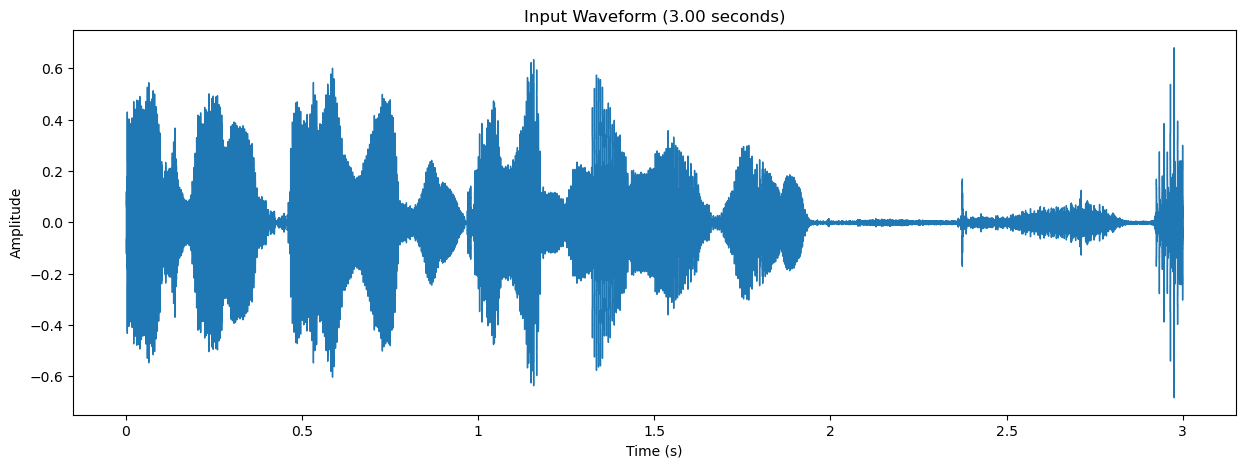

In [69]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Path to your stuttered audio file
audio_file_path = "C:/Users/BEHARA AMULYA/Downloads/stutter-classification-main/clips/stuttering-clips/clips/WomenWhoStutter_97_111.wav"

# Load the audio file using librosa
audio, sample_rate = librosa.load(audio_file_path, sr=None)

# Get the duration of the audio in seconds
duration = librosa.get_duration(y=audio, sr=sample_rate)

# Generate a time axis for the waveform plot
time = librosa.times_like(audio, sr=sample_rate)

# Plot the waveform
plt.figure(figsize=(15, 5))
librosa.display.waveshow(audio, sr=sample_rate)
plt.title(f"Input Waveform ({duration:.2f} seconds)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()
